# Statistics Final Exam

## Section A

## Library Importation

In [379]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


## 1.ICU Data Loading

In [382]:
#Load and Explore the Dataset
ICU_Data = pd.read_csv ("ICU Dataset.csv")  # add path to your data
ICU_Data

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1,75.0,29.912791,15,9,SICU,...,354,138,4.6,15.0,109,41,1.6,196,39,2230.875000
1,0,1.14,1,64.92076,0,55.0,20.121312,0,5,MICU,...,0,0,0.0,0.0,0,0,0.0,0,0,600.000000
2,0,2.86,5,36.50000,0,70.0,27.118272,16,5,MICU,...,295,144,3.9,17.0,101,16,0.8,298,30,2086.800293
3,1,0.58,3,44.49191,0,0.0,0.000000,21,7,SICU,...,262,139,4.2,31.0,100,16,0.5,146,23,0.000000
4,1,1.75,5,23.74217,1,95.2,28.464563,18,7,SICU,...,22,146,3.4,19.0,110,10,1.0,134,30,2358.244141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,1,26.90,31,68.48606,1,76.6,0.000000,17,8,MICU,...,294,135,3.4,23.0,100,17,0.9,253,35,100.117500
1772,1,3.70,4,72.44020,0,60.0,0.000000,14,5,SICU,...,363,138,6.3,22.0,104,20,0.8,154,45,289.950012
1773,0,2.87,3,22.70098,1,69.0,0.000000,16,5,MICU,...,121,134,4.1,23.0,105,27,0.6,0,0,157.500000
1774,1,22.63,23,53.74423,1,124.4,0.000000,18,9,SICU,...,374,137,4.6,21.0,99,13,1.1,84,31,21.770000


## Selecting Variables of Interest

In [385]:
# Select 6 variables of interest to work with
VariablesOfInterest = ICU_Data [["hospital_los_day","age","map_1st","hr_1st","temp_1st", "spo2_1st"]]
VariablesOfInterest

,hospital_los_day,age,map_1st,hr_1st,temp_1st,spo2_1st
0,13,72.36841,92.000000,86,95.900002,100
1,1,64.92076,86.666702,85,97.599998,100
2,5,36.50000,69.666702,135,96.300003,99
3,3,44.49191,101.000000,125,100.099998,100
4,5,23.74217,105.000000,107,96.300003,100
...,...,...,...,...,...,...
1771,31,68.48606,106.000000,62,96.500000,92
1772,4,72.44020,94.000000,50,98.400002,99
1773,3,22.70098,100.000000,117,100.400002,100
1774,23,53.74423,95.000000,72,99.900002,98


## Data Cleaning

In [388]:
#Describe the data quantitatively.

ICU_Data.describe()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
count,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,...,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000
mean,0.554054,3.346498,8.110923,54.379660,0.577140,75.116289,20.525779,13.460023,5.801239,0.552928,...,244.974662,139.166104,4.096059,24.347917,103.546734,19.223536,1.092005,203.784347,38.867117,1492.234615
std,0.497210,3.356261,8.157159,21.062854,0.494153,29.107346,14.130223,5.022830,2.355077,0.497331,...,100.994385,8.774033,0.822922,5.150361,7.942119,14.382976,1.083512,153.776161,18.756267,1667.711517
min,0.000000,0.500000,1.000000,15.180230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.370000,3.000000,38.247318,0.000000,63.000000,0.000000,11.000000,4.000000,0.000000,...,181.000000,137.000000,3.600000,22.000000,101.000000,11.000000,0.700000,82.000000,33.000000,192.089993
50%,1.000000,2.185000,6.000000,53.678585,1.000000,75.000000,23.589902,14.000000,6.000000,1.000000,...,239.000000,140.000000,4.000000,24.000000,104.000000,15.000000,0.900000,173.500000,40.000000,900.282501
75%,1.000000,4.002500,10.000000,72.762992,1.000000,89.200000,28.913280,17.000000,7.000000,1.000000,...,297.000000,142.000000,4.400000,27.000000,107.000000,22.000000,1.100000,298.250000,46.000000,2331.549926
max,1.000000,28.240000,112.000000,99.110950,1.000000,257.600000,98.797134,32.000000,17.000000,1.000000,...,988.000000,165.000000,9.800000,62.000000,133.000000,139.000000,18.300000,634.000000,158.000000,13910.000000


In [389]:
#Perform thorough data cleaning of the dataset.
cleanedData = ICU_Data.dropna()
cleanedData

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1,75.0,29.912791,15,9,SICU,...,354,138,4.6,15.0,109,41,1.6,196,39,2230.875000
1,0,1.14,1,64.92076,0,55.0,20.121312,0,5,MICU,...,0,0,0.0,0.0,0,0,0.0,0,0,600.000000
2,0,2.86,5,36.50000,0,70.0,27.118272,16,5,MICU,...,295,144,3.9,17.0,101,16,0.8,298,30,2086.800293
3,1,0.58,3,44.49191,0,0.0,0.000000,21,7,SICU,...,262,139,4.2,31.0,100,16,0.5,146,23,0.000000
4,1,1.75,5,23.74217,1,95.2,28.464563,18,7,SICU,...,22,146,3.4,19.0,110,10,1.0,134,30,2358.244141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,1,26.90,31,68.48606,1,76.6,0.000000,17,8,MICU,...,294,135,3.4,23.0,100,17,0.9,253,35,100.117500
1772,1,3.70,4,72.44020,0,60.0,0.000000,14,5,SICU,...,363,138,6.3,22.0,104,20,0.8,154,45,289.950012
1773,0,2.87,3,22.70098,1,69.0,0.000000,16,5,MICU,...,121,134,4.1,23.0,105,27,0.6,0,0,157.500000
1774,1,22.63,23,53.74423,1,124.4,0.000000,18,9,SICU,...,374,137,4.6,21.0,99,13,1.1,84,31,21.770000


In [391]:
correlation_matrix = VariablesOfInterest.corr()
correlation_matrix

,hospital_los_day,age,map_1st,hr_1st,temp_1st,spo2_1st
hospital_los_day,1.000000,0.071345,0.000892,0.064949,0.034921,-0.012069
age,0.071345,1.000000,0.021569,-0.223304,-0.016969,-0.070014
map_1st,0.000892,0.021569,1.000000,0.092083,0.014609,0.012020
hr_1st,0.064949,-0.223304,0.092083,1.000000,0.029342,-0.037237
temp_1st,0.034921,-0.016969,0.014609,0.029342,1.000000,0.001723
spo2_1st,-0.012069,-0.070014,0.012020,-0.037237,0.001723,1.000000


## Boxplots

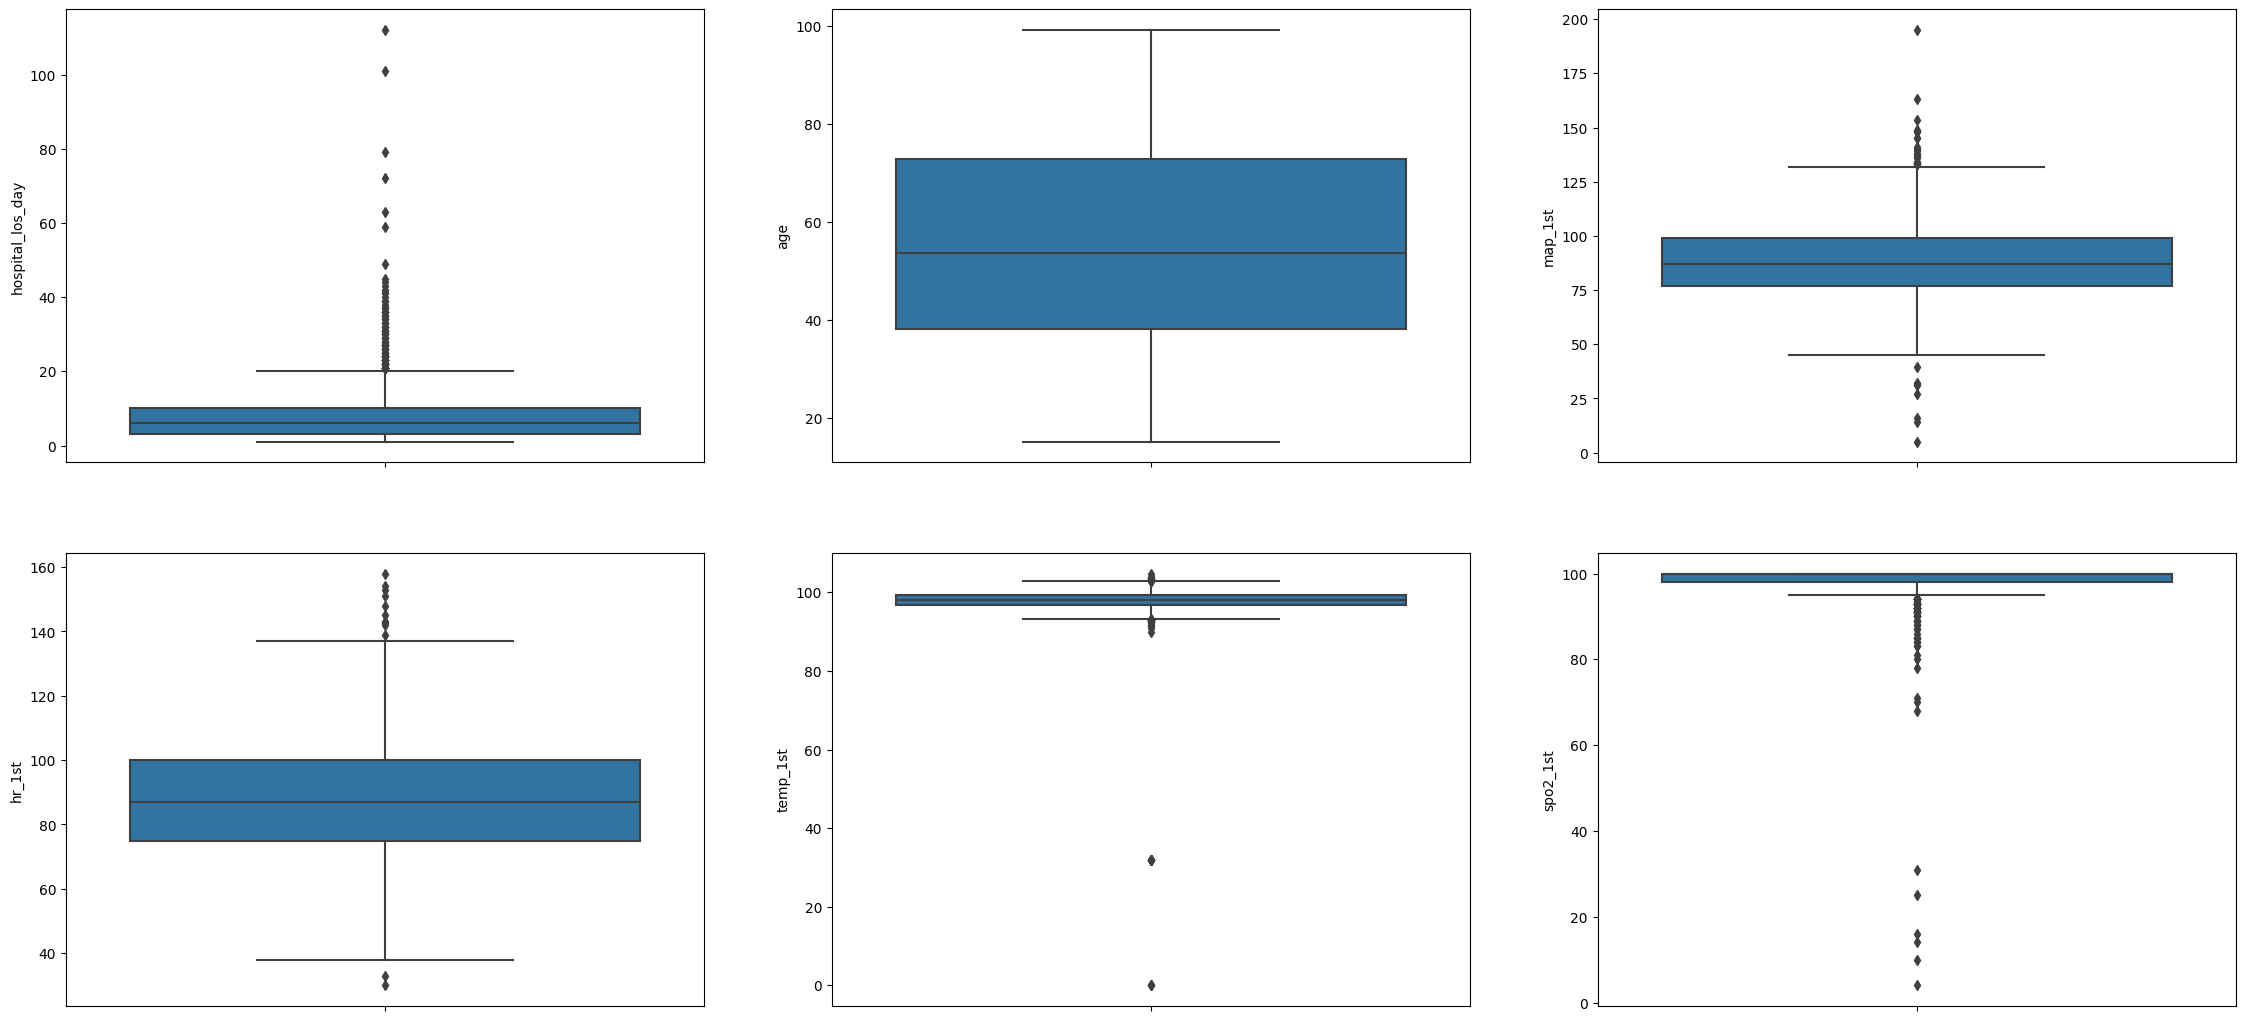

In [395]:
#Plot boxplots to identify whether we have outliers.

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (28,20))            
count = 0                                       

for variable in VariablesOfInterest:            
    count += 1
    plt.subplot (3,3, count)
    ax = sns.boxplot (y = variable, data = ICU_Data) 
plt.show()                                      

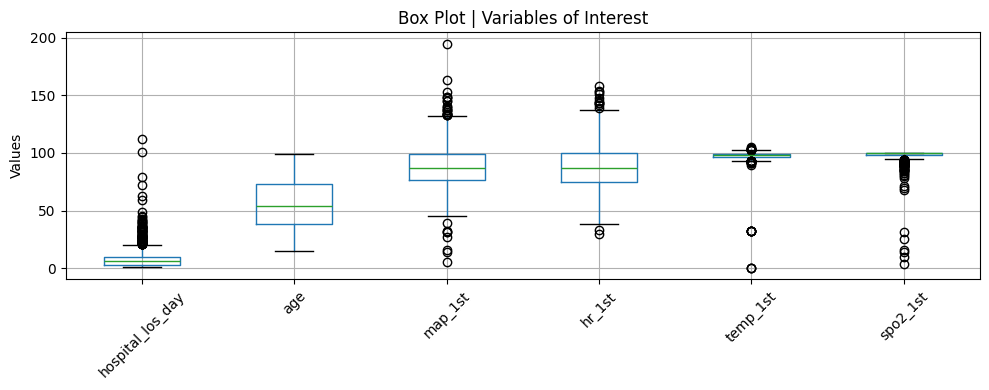

In [396]:
#Remove the outliers

plt.figure(figsize=(10,4))
VariablesOfInterest.boxplot()

plt.title("Box Plot | Variables of Interest")
plt.ylabel("Values")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [397]:
Initial_Null_Value = ICU_Data.isnull().sum().sum()

import numpy as np

ICU_Data.loc[ICU_Data["hospital_los_day"]>25,"hospital_los_day"] = np.nan
ICU_Data.loc[ICU_Data["hospital_los_day"]<0,"hospital_los_day"] = np.nan

ICU_Data.loc[ICU_Data["map_1st"]>125,"map_1st"] = np.nan
ICU_Data.loc[ICU_Data["map_1st"]<50,"map_1st"] = np.nan

ICU_Data.loc[ICU_Data["hr_1st"]>140,"hr_1st"] = np.nan
ICU_Data.loc[ICU_Data["hr_1st"]<40,"hr_1st"] = np.nan

ICU_Data.loc[ICU_Data["temp_1st"]>110,"temp_1st"] = np.nan
ICU_Data.loc[ICU_Data["temp_1st"]<80,"temp_1st"] = np.nan

ICU_Data.loc[ICU_Data["spo2_1st"]>110,"spo2_1st"] = np.nan
ICU_Data.loc[ICU_Data["spo2_1st"]<90,"spo2_1st"] = np.nan

Final_Null_Value = ICU_Data.isnull().sum().sum()



In [398]:
print("These are the observations removed:" + str(Final_Null_Value - Initial_Null_Value))

print("There are the observations that comform the outliers:" 
      + str(round((Final_Null_Value - Initial_Null_Value) *100/ICU_Data.shape[0],2))+"%")

These are the observations removed:171
There are the observations that comform the outliers:9.63%


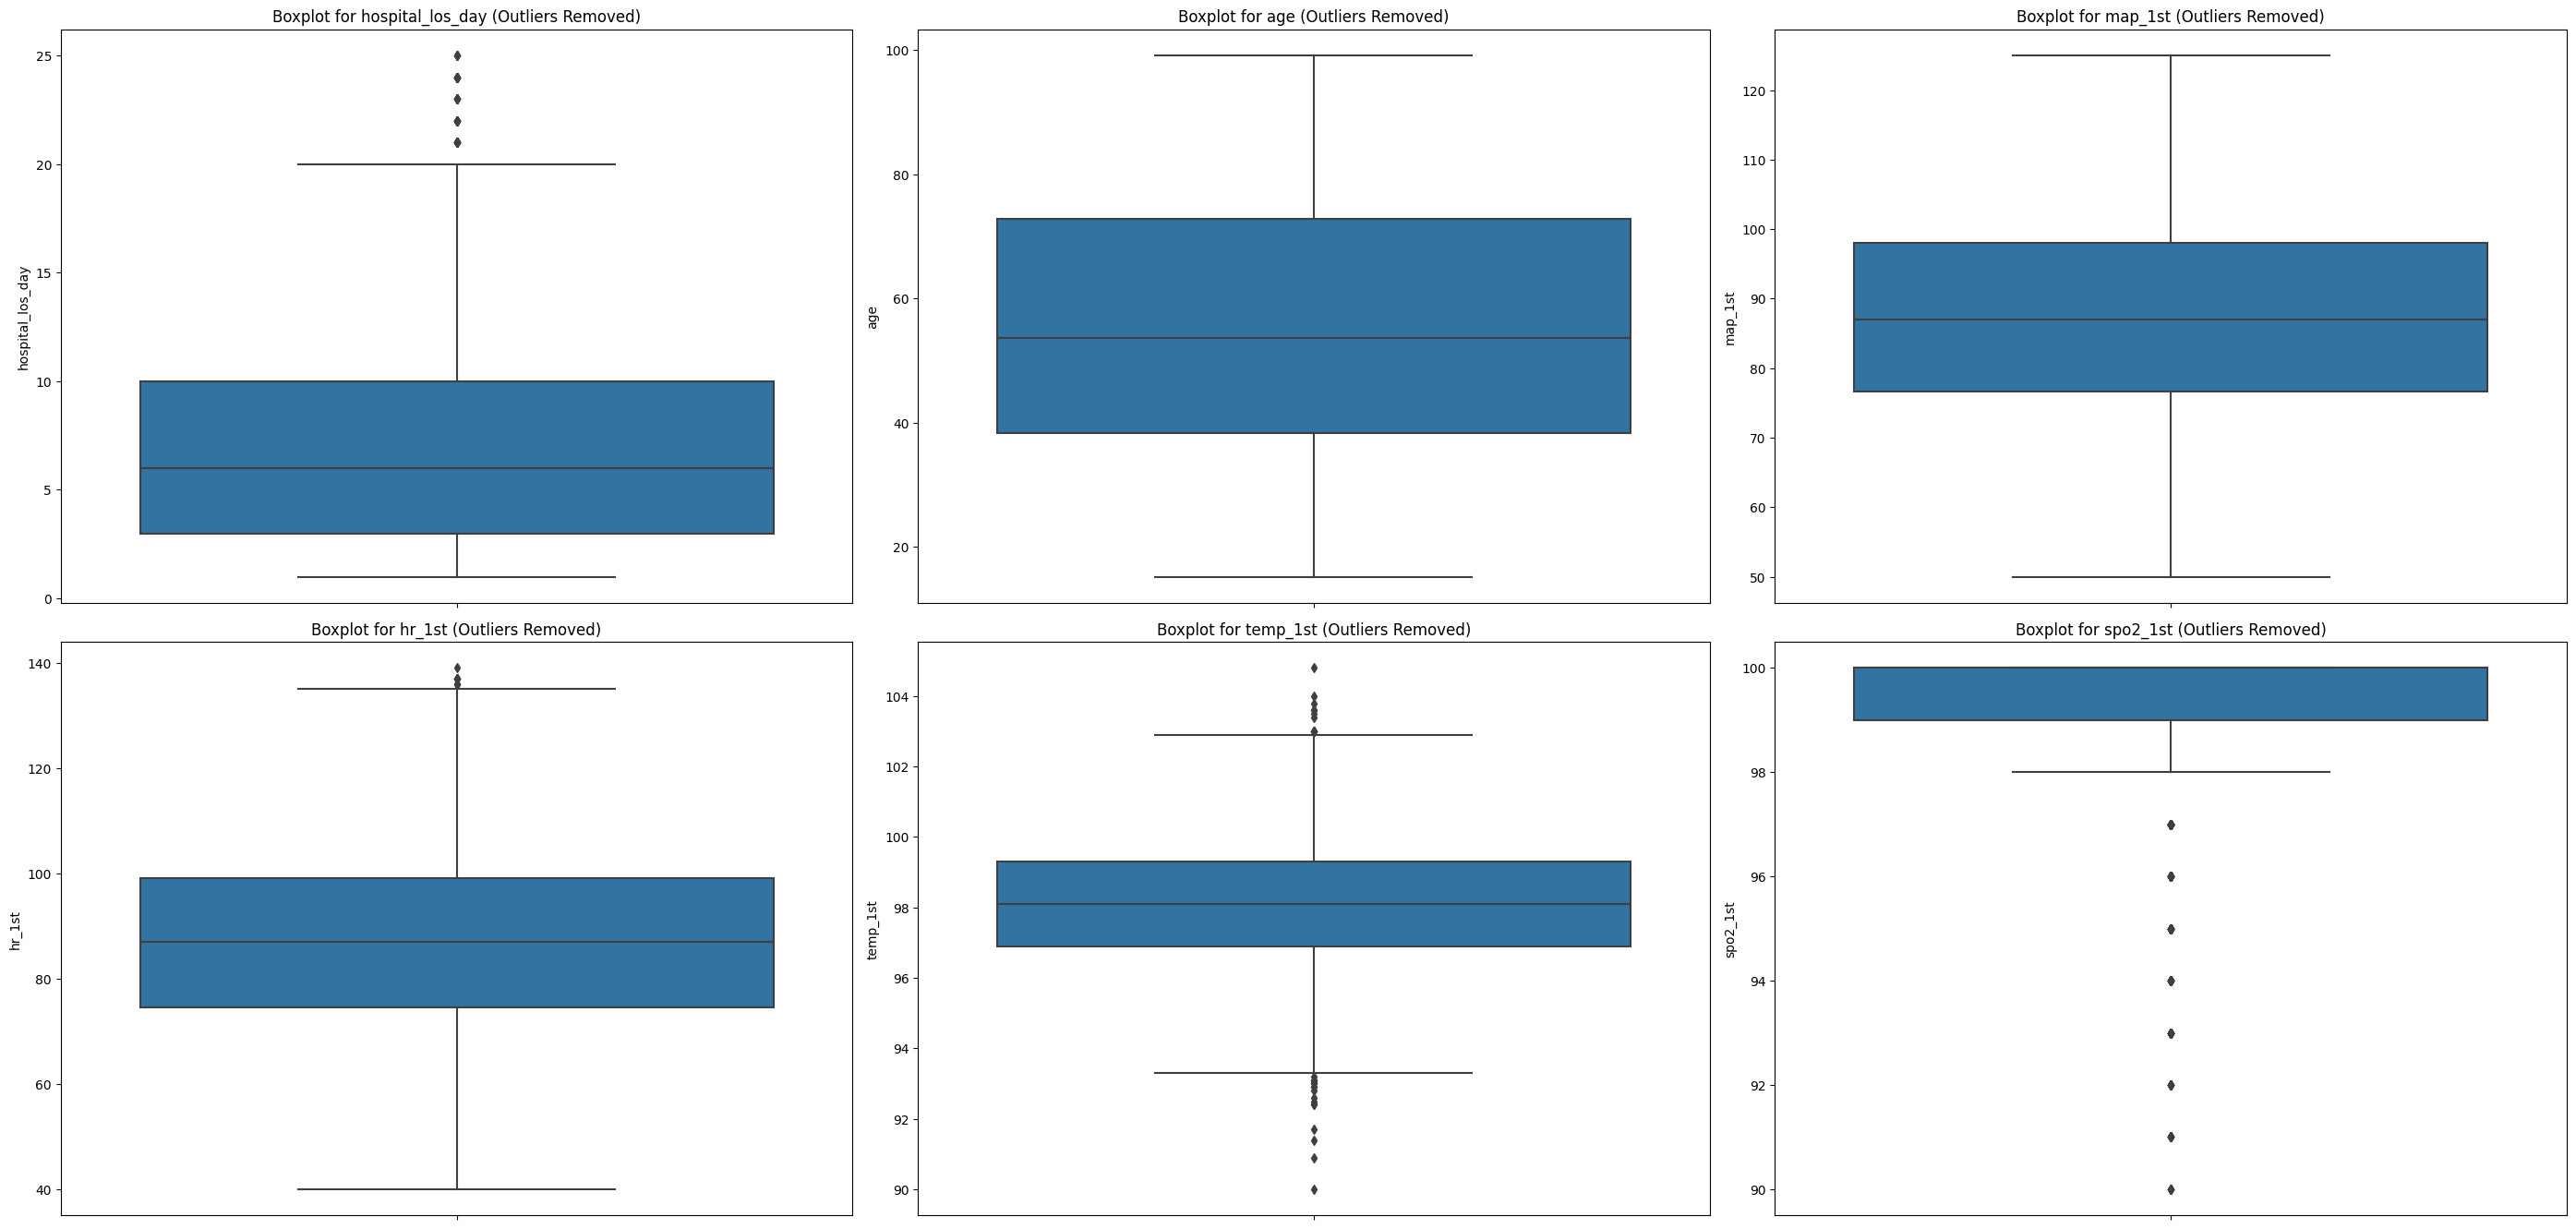

In [399]:
#Outliers Removed
fig = plt.figure(figsize=(28, 20))
count = 0

for variable in VariablesOfInterest:
    count += 1
    plt.subplot(3, 3, count)
    sns.boxplot(y=ICU_Data[variable].dropna())
    plt.title(f"Boxplot for {variable} (Outliers Removed)")

plt.tight_layout()
plt.show()

## Median, Mean, Variance, Standard deviation

In [401]:
selected_columns = ICU_Data[["hospital_los_day", "age", "map_1st", "hr_1st", "temp_1st", "spo2_1st"]]

mean_values = selected_columns.mean()
median_values = selected_columns.median()
variance_values = selected_columns.var()
std_values = selected_columns.std()

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nVariance:\n", variance_values)
print("\nStandard Deviation:\n", std_values)

Mean:
 hospital_los_day     7.080955
age                 54.379660
map_1st             87.498352
hr_1st              87.666478
temp_1st            98.052979
spo2_1st            98.919817
dtype: float64

Median:
 hospital_los_day      6.000000
age                  53.678585
map_1st              87.000000
hr_1st               87.000000
temp_1st             98.099998
spo2_1st            100.000000
dtype: float64

Variance:
 hospital_los_day     27.401951
age                 443.643827
map_1st             232.018511
hr_1st              328.745680
temp_1st              3.465294
spo2_1st              3.827378
dtype: float64

Standard Deviation:
 hospital_los_day     5.234687
age                 21.062854
map_1st             15.232154
hr_1st              18.131345
temp_1st             1.861530
spo2_1st             1.956369
dtype: float64


## 2.Logistic Regression Analysis

In [436]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [461]:
X= ICU_Data.drop ('service_unit',axis = 1)  # dropping service unit to only remain with numerical columns

X = ICU_Data.drop ('icu_exp_flg',axis = 1) # Removing mortality variable

y =  ICU_Data ['icu_exp_flg']


In [520]:
y_train = y_train.dropna()
y_test = y_test.dropna()
X_train = y_train.dropna()
X_test = y_test.dropna()

In [523]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [525]:
X, y = datasets.load_iris(return_X_y= True)

In [527]:
X_train.shape

(120, 4)

In [528]:
X_test.shape

(30, 4)

### Scale only X_train and X_test

In [532]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [534]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [541]:
#Model prediction
y_pred = model.predict(X_test)

In [544]:
accuracy = r2_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


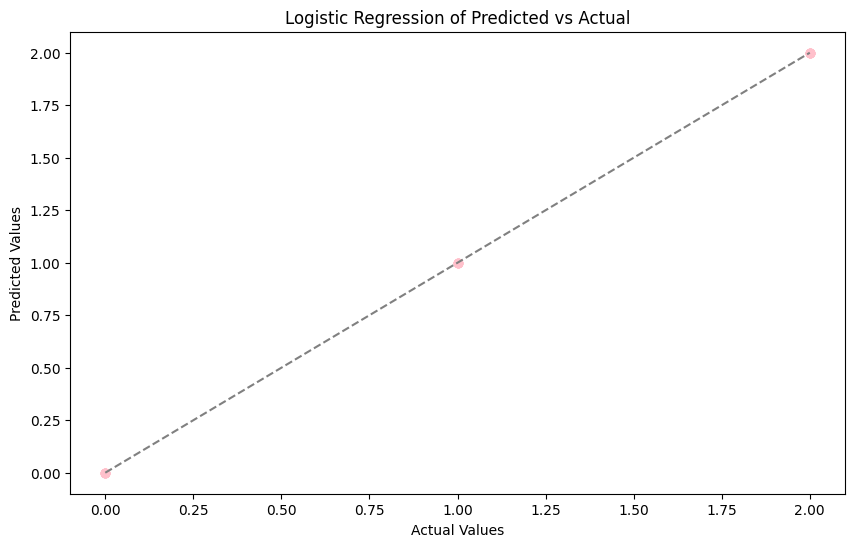

In [550]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred, color='pink',alpha = 0.7)
plt.plot([min(y_test), max(y_test)],
         [min(y_pred), max(y_pred)], color = "gray",
         linestyle = '--')
plt.title("Logistic Regression of Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Confusion Matrix 

In [ ]:
from IPython.display import Image, display
display(Image('Confusion matrix.png', width=800))

In [ ]:
#Sorry teacher, thats all =(

# Section 2 Answer only one Question

## 1. Binomial Distribution

a. Sixty-five percent of people pass the state driver’s exam on the first try. A group of 50
individuals who have taken the driver’s exam is randomly selected. Give reasons why
this is a binomial problem.

In [489]:
# 1. Existence of Two Possible Outcomes, pass or fail.
# 2. Independent Outcomes, the results are independent of each other

b. Suppose you play a game that you can only either win or lose. The probability that you win any game is
55%, and the probability that you lose is 45%. Each game you play is independent.
1. If you play the game 20 times, write the function that describes the probability that you win 15 of the
20 times.
2. Find the mean number of wins.
3. Find the standard deviation of wins.

In [492]:
from scipy.stats import binom

In [498]:
#1.If you play the game 20 times, write the function that describes the probability that you win 15 of the 20 times.

from scipy import stats
n = 20 # number of trials
p = 0.55 #probability of sucess
k = 15 # number of success

binomProb = stats.binom.pmf(k,n,p)
print(f"The probability of winning exactly 15 out of 20 games is: {binomProb:.4f}")

The probability of winning exactly 15 out of 20 games is: 0.0365


In [501]:
#2.Find the mean number of wins.

mean_game = n * p
print(f"The mean is: {mean_game}")

The mean is: 11.0


In [504]:
#3.Find the standard deviation of wins.

import math
std_dev_game = math.sqrt(n * p * (1 - p))
print(f"The standard deviation is: {std_dev_game:.4f}")

The standard deviation is: 2.2249


c.  Explain in details two areas in market analysis where binomial distribution can be applied.

1. Lead Conversion Rate
    > Companies have potential customers, and needs to conversion those in real customers, so this conversion rate is the percentage of leads that become paying customers after an initial "contact".

    > For example, we have a list of 500 leads, and the probability of converting into a customer is 10%

    > So, we can use binominal distribution to check exatly that, below example:

In [510]:
n = 500 # number of trials
p = 0.1 #probability of sucess
k = 50 # number of success

binomProb = stats.binom.pmf(k,n,p)
print(f"The probability of converting exactly 50 out of 500 leads is: {binomProb:.4f}")

The probability of converting exactly 50 out of 500 leads is: 0.0594


2. Email Marketing Campaigns
    > Its a commun metric of market to shows how many recipients open the emails sent.
    
    > Por example, we you have 1000 emails sent in a campaign, and the average open rate is 30%.
    
    > So, we can use binominal distribution to check exatly that, below example:



In [514]:
n = 1000 # number of trials
p = 0.3 #probability of sucess
k = 300 # number of success

binomProb = stats.binom.pmf(k,n,p)
print(f"The probability of opening exactly 300 out of 1000 emails is: {binomProb:.4f}")

The probability of opening exactly 300 out of 1000 emails is: 0.0275


## 2. Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error


In [ ]:
scaler = StandardScaler()   # Data scaling before splitting
X = scaler.fit_transform(X)

## The End and All The Best